---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task
### David Harar

### Import required modules and load data file
The dataset we're going to use is a small, very simple, example dataset derived from one originally created by Dr. Iain Murray at the University of Edinburgh for the task of training a classifier to distinguish between different types of fruit.
Dr. Murray went to a nearby store, bought a few dozen oranges, lemons, and apples of different varieties, and recorded their measurements in a table. 


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In a supervised learning problem, the data will include a label column, which will be the `y` we will enter the model. The rest of the columns obove are self explenatory. The `color_score` is meant to capture the color of the fruit in a spectrum scale. Scores around 1 mean that the fruit is red, 0.75-orange, 0.65-Yellow and 0.45 is green.
* **We want to create a classifier that will predict the fruit given inputs about its mass, width, hight and color-score**.  
* **A disedvantage of the model is that it will predict the label only for fruits that it will be traind apon**.

In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

We will be splitting the dataset into two parts, the training set and a test set.

### Examining the data

<IPython.core.display.Javascript object>


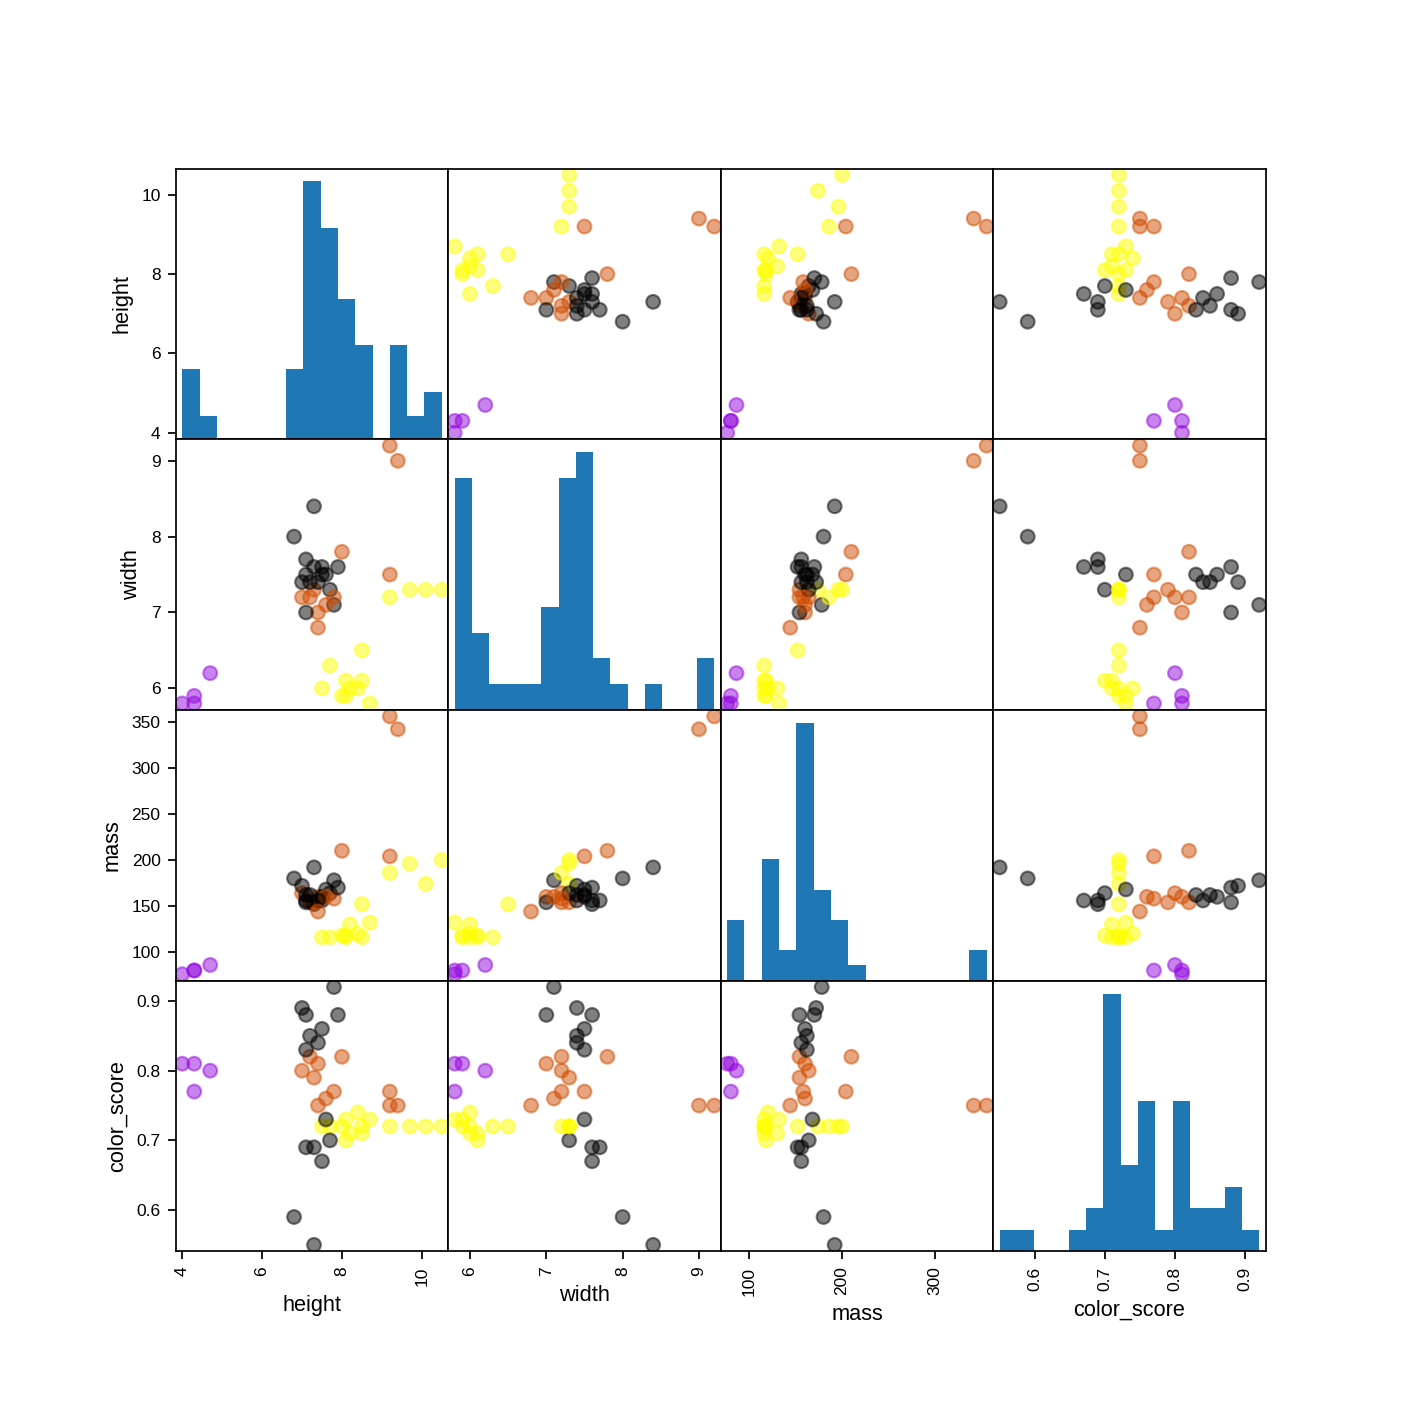

In [4]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


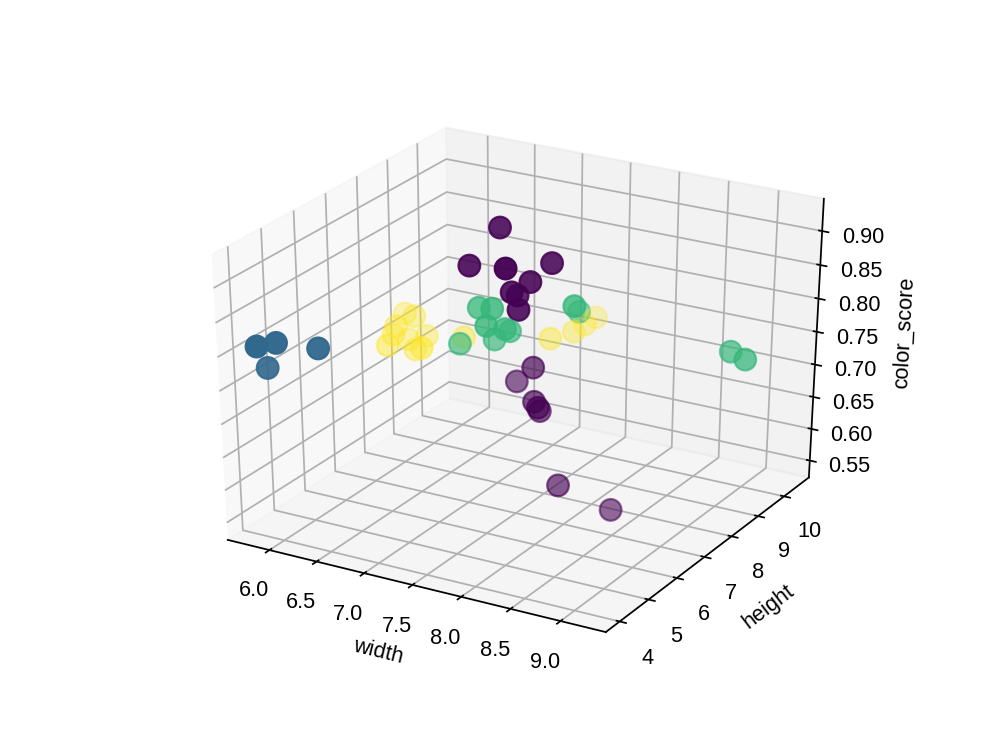

In [5]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split
In order to split the dataset we will use a built-in scikit learn function called **train_test_split()** which will randomaly sample our dataset under user-defined proportions.

In [6]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
print('fruit.shape:', fruits.shape, '\n',
      'X_train.shape:', X_train.shape, '\n',
      'X_test.shape:', X_test.shape, '\n',
      'y_train.shape:', y_train.shape, '\n',
      'y_test.shape:', y_test.shape, '\n',
      'train/total ratio:', (len(X_train)/len(fruits)))

fruit.shape: (59, 7) 
 X_train.shape: (44, 3) 
 X_test.shape: (15, 3) 
 y_train.shape: (44,) 
 y_test.shape: (15,) 
 train/total ratio: 0.7457627118644068


In [8]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [9]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

### Create classifier object
We will use the **KNN** which can be used for both regression and classification. Here we have a classification problem. 
KNN is an example of what is called **inctance based/memory based supercised learning**. What this means is that instance based learning methods work by memorizing the labeled examples that they see in the training set. And then they use those memorized examples to classify new objects later.
The **k** in kNN refers to the number of examples (neighbors) the classifier will retrive and use to classify new data. 
The kNN hase three steps:
1. Find the most similar inctances (we will call them **X_NN**) to x_test that are belong to the X_train dataset.
2. Get the labels y_NN for the instances in X_NN
3. Predict the label for x_test by combining the labels y_NN, e.g. simple majority vote.

![](https://dslytics.files.wordpress.com/2017/11/knn.png)

In the photo above, we chose k to be 3, then we look at the three closest example to observation $i$, look at theit label and by the majority of purple examples we decide to label star as purple to.

In order to be specified, a kNN needs four things specified:
1. A distance metric (Euclidean, etc.)
2. k - How many 'nearest' neighbors to use when making a prediction (k>=1)?
3. Optimal weighting dunction on the neighbors points. Mabye we want that inctances that are closer to the new instance that we are trying to classify to have higher weight when making the prediction.
4. Method for aggregating the classes of neighbot points (a simple majority rule for example).

`scikit-learn` by defoult uses the majority rule.
Once we have our train-test split, we then need to create an instance of the classifier object that includes the number of neighbors.


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

The **KNeighborsClassifier** is an estimator and all the estimators in `scikit-learn` have a fit function.

### Train the classifier (fit the estimator) using the training data
We then train the classifier by passing in the training set data (`X_train`), and the lebels (`y_train`).


In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The meaning of **.fit** is that using the training data we update the knn estimator - which means in the case of the knn algorithm it will memorize the training set examples for future use. 

### Estimate the accuracy of the classifier on future data, using the test data
Now, after we trained our model we have got parametets. In order to measure how accurate the model, an effective thing to do is to try to predict the labels of a newly unseen data, which will be the test dataset.


In [12]:
knn.score(X_test, y_test)

0.53333333333333333

The **score** function measures the fraction of the cases where the classifier was classify the unseen data correctly to the cases where it was wrong. The score we have got means that the classifier was correct in about $53.33%$ of the times.

### Use the trained k-NN classifier model to classify new, previously unseen objects
Now that we have a classifier we could pass it an input and get an output.

In [13]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [22]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier
The 'uniform' parameter means that we did not use weighting martix for the classification.

<IPython.core.display.Javascript object>


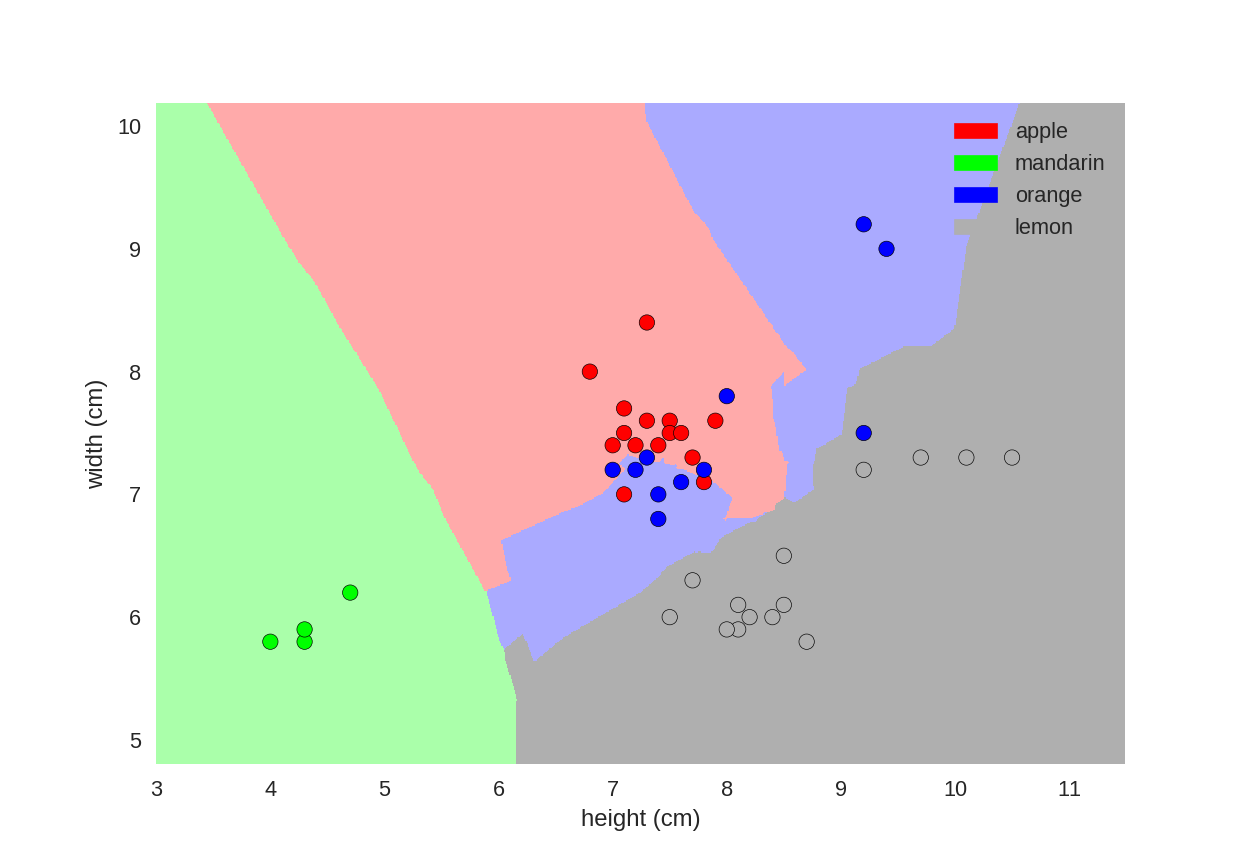

In [23]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

<IPython.core.display.Javascript object>


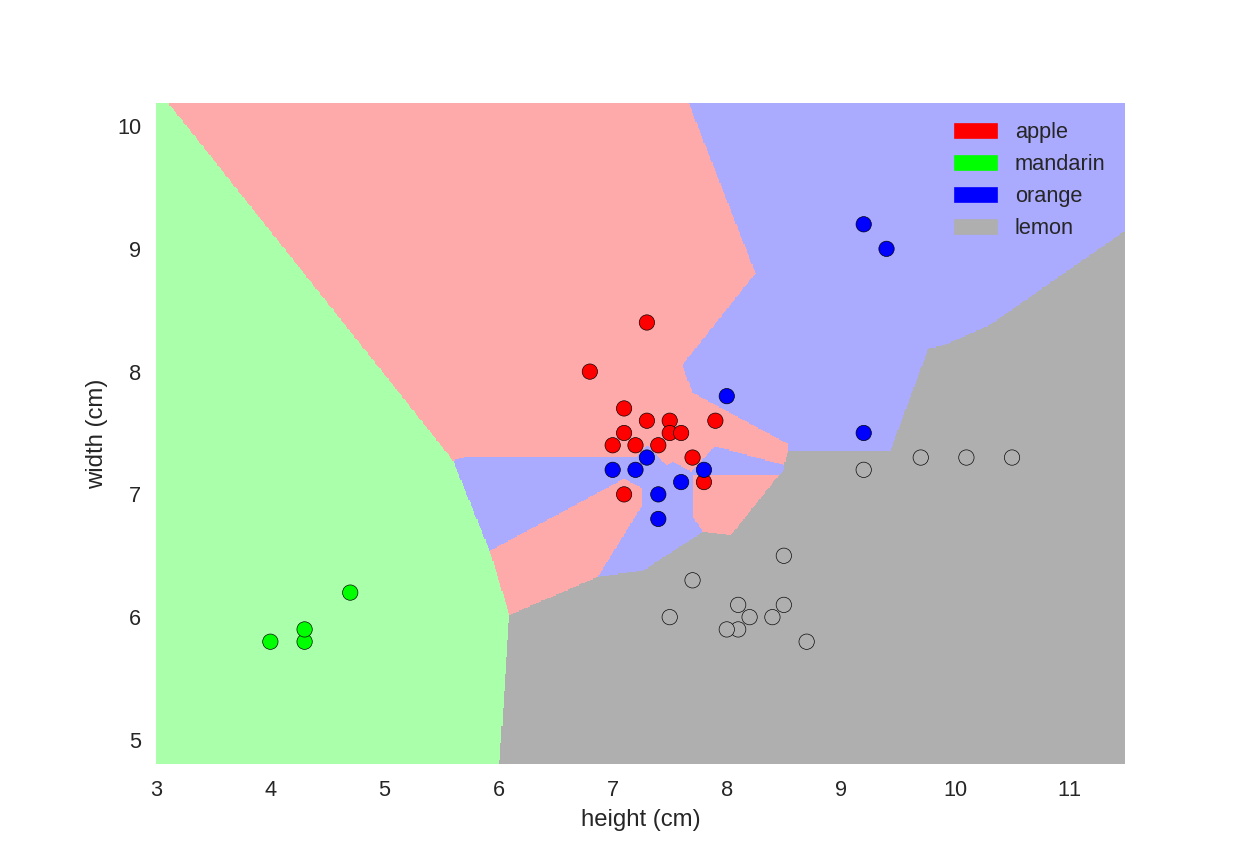

In [24]:
# And another example, with k=1
plot_fruit_knn(X_train, y_train, 1, 'uniform')   

In general, the best choice of the value of k, that is the one that leads to the highest accuracy, can vary greatly depending on the data set.
In general with k-nearest neighbors, using a larger k suppresses the effects of noisy individual labels. But results in classification boundaries that are less detailed.


# In summary:
* A low value of “k” (close to 1) is more likely to overfit the training data and lead to worse accuracy on the test data, compared to higher values of “k”.
* Setting “k” to the number of points in the training set will result in a classifier that always predicts the majority class.
* The k-nearest neighbors classification algorithm has to memorize all of the training examples to make a prediction.


### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


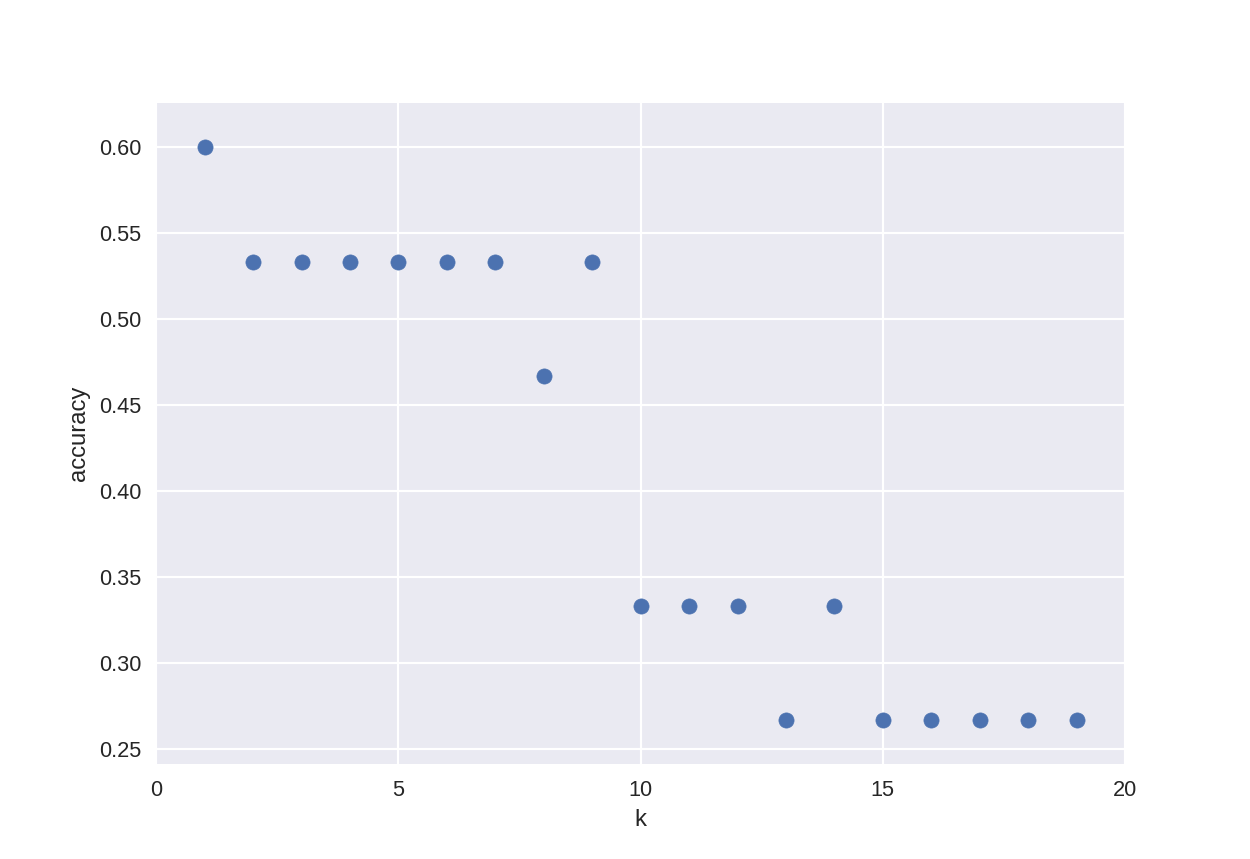

In [25]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


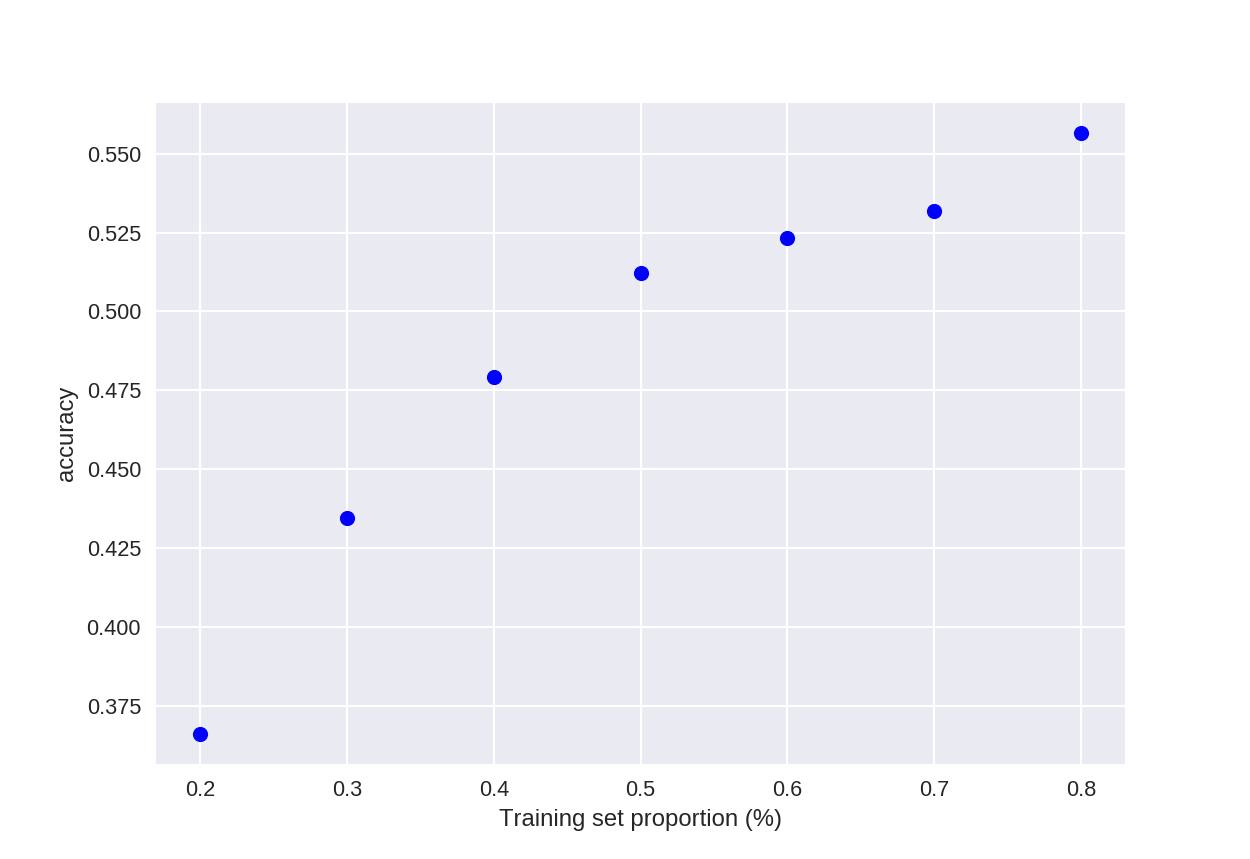

In [26]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');